In [ ]:
from google.colab import files
files.upload()

:Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE STARTS HERE` or "YOUR ANSWER HERE", as well as your name and ID number below:

In [ ]:
NAME = ""
ID = ""

# Assignment 1
Welcome to the first NNFL assignment. Please read the instructions given below carefully before attempting the assignment.  
- Do NOT import any other modules
- Do NOT change the prototypes of any of the functions
- Sample test cases are already given, test your code using these sample cases
- Grading will be based on hidden test cases
- Please solve this notebook using [Google Colab](https://colab.research.google.com/) as the required packages are already installed 

In [ ]:
#DO NOT IMPORT ANY OTHER LIBRARY
#Run these cells as it is
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import time
import datetime
import re
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import math
from tqdm import tqdm
from copy import deepcopy
import seaborn as sns
try:
    import plotly.graph_objects as go
except:
    !pip install plotly # Or install the plotly library manually
    import plotly.graph_objects as go    

from matplotlib.pyplot import figure
import time
from tabulate import tabulate

# required only for jupyter notebooks / while running on colab
%matplotlib inline 

# set seed
seed = 42
np.random.seed(seed)

# Part A - Data pre-processing + linear regression

---



---



---


This is the first section of the assignment. You will implement Linear Regression to create a model that predicts the magnitude of an earthquake given its properties.

 There is an explanation given before each code block as well as it has been mentioned what you would have to code. Read everything carefully.

Introduction: Linear regression is a linear approach for modelling the relationship between a scalar response and one or more explanatory variables. The case of one explanatory variable is called simple linear regression; for more than one, the process is called multiple linear regression. It is used to predict the value of a variable based on the value of another variable(s). It uses the linear activation function. The diagram given below will give you a brief idea. We will explain more about linear regression as we proceed.
<!-- ![Alt text](https://miro.medium.com/max/985/1*KP0U9y1o4QUaFMwUsXqXyw.png) -->

![Alt text](https://qph.fs.quoracdn.net/main-qimg-791aad9d66fa3113e7036d8121e91213)

## Loading the Dataset

In [ ]:
train = pd.read_csv('train.csv')
train_x = train[['Latitude', 'Longitude', 'Depth']]
y_train = np.array(train['Magnitude']).astype(float)
y_train = y_train.reshape(y_train.shape[0], 1)
x_train = np.array(train_x).astype(float)
x_train = x_train.reshape(x_train.shape[0], 3)
x_train.shape

In [ ]:
test = pd.read_csv('test.csv')
test_x = test[['Latitude', 'Longitude', 'Depth']]
y_test = np.array(test['Magnitude']).astype(float)
y_test = y_test.reshape(y_test.shape[0], 1)
x_test = np.array(test_x).astype(float)
x_test = x_test.reshape(x_test.shape[0], 3)
x_test.shape

## Standardization [0.25 marks]

Standardizing the data is a good practice. Standardization is a scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation. Standardizing features helps us in training the model faster.

The formula for standardizing the data is given below:

# $X′= \frac{X−μ}{σ}\hspace{4cm}-(a)$ 

where

μ : mean of the attribute

σ : standard deviation of the attribute

Numpy provides functions to implement the above

For additional information refer [this](https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff).

In [ ]:
#GRADED - 0.25 MARKS
def standardize(X):
    """
    Args:
        'X': numpy ndarray 
    Returns:
        'X_norm': normalized X also in numpy ndarray format
    """
    
    # YOUR CODE HERE
    X_norm = (X - np.mean(X, axis=0))/np.std(X, axis=0)
    return X_norm
    raise NotImplementedError()

In [ ]:
# Sample test cases
np.random.seed(seed)
x = np.random.randint(0, 100, size = (10,2))
x = standardize(x)
assert np.allclose(x[1,0], -1.0394283)
print('Sample Test passed', '\U0001F44D')

In [ ]:
# hidden test cases. Do not modify

## Initialize parameters [0.25 marks]

As uncomplicated it may seem, initializing your weights play an important role in overall performance of your model. If initial wts. are too small/large then it may lead to problem of vanishing/exploding gradients respectively.

For introductory purpose, we will be taking weights from Gaussian Distribution. But there are has been tremendous research in this area, and Xavier Initialization has proved to be very effective for multiple tasks. There are in-built methods for Xavier initialization in frameworks like tensorflow, pytorch, caffe. To understand the maths behind Xavier Initialization, refer to the article attached below!

Refer to this article to understand the importance of effective initialization. [deeplearning.ai/notes](https://www.deeplearning.ai/ai-notes/initialization/#IV)

For our model we will be initialising Weights as an array or random integers and bias as array of zeroes. You can take help of formula $(i)$ from the next section's theory i.e. forward to know the relation between the dimensions of W and b with respect to X and Y. 

### 
Initialise weights with the shape given in function below having values **between 0 and 1** using numpy.random.rand function.

(NOTE : USE **numpy.random.rand** function for this. Different functions can create different random values and this might result in your code not passing the test cases)

> Initialise bias with the shape given below as a numpy array having all zeros.

In [ ]:
#GRADED - 0.25 MARKS
def initialize_parameters(X, Y):
    """
    Args:
    'Y': ndarray of shape (m,output_size)
    'X': ndarray of shape (m, no. of features)
    Returns:
    'W', 'b': Wts. and biases
    'W' : ndarray of shape(no. of features, output_size)
    'b' : ndarray of shape(1, output_size)
    
    USE output_size = 1 since we are only predicting whether a passenger survives or not. 
    """
    # YOUR CODE STARTS HERE
    return W1, b1
    raise NotImplementedError()

In [ ]:
# sample test case
np.random.seed(seed)
W_check, b_check = initialize_parameters(np.array([[1, 2], [3, 4]]), np.array([[0], [1]]))
assert W_check.shape == (2,1)
assert b_check.shape == (1,1)
assert np.allclose(W_check[0],[0.3745401])
print('Sample Test passed', '\U0001F44D')

In [ ]:
# hidden test cases. Do not modify

## Forward [0.25 marks]

This is the function where actual calculation of the prediction values happen with the help of weights and bias.

For two varaibles it is a straight line of form $y = mx + c$ there m and c are slope and intercepts of line respectively but for more than one variables since each variable contributes to the output value the equation becomes a dot product of weights with the variables. Where each weight ($w_i$) represent the propotionality factor of prediction values with respect to the corresponding variable ($x_i$). $b$ is refered as bias which is analogus to the intercept value in case of two variables. 

# $ \boxed{Y_{pred} = Activation function (w_1 x_1 + w_2 x_2 + .... + w_i x_i + b)}\hspace{4cm} -(i)$

The activation function we'll be using here will be a linear activation function. It gives a range of outputs which are proportional to the input.

![Alt text](https://miro.medium.com/max/1400/1*tldIgyDQWqm-sMwP7m3Bww.png)

# $ Y_{pred} = (X \cdot W + b)$

In [ ]:
#GRADED - 0.25 MARKS
def forward(X, W, b):
    """
    Args:
    'X': ndarray of shape (m,no.of features)
    'W': ndarray of shape (no. of features, output_size)
    'b': ndarray of shape (1, output_size) 
    Returns:
    calculated Y_pred value using X,W and b
    """
    # YOUR CODE STARTS HERE
    return Y_pred
    raise NotImplementedError()

In [ ]:
#sample test case
#DO NOT CHANGE THIS CODE
np.random.seed(seed)
X_test = np.random.randn(2,1)
np.random.seed(seed+1)
W_test = np.random.randn(1,2)
np.random.seed(seed+2)
b_test = np.random.randn(1,2)
forward_test = forward(X_test, W_test, b_test)
assert np.allclose(forward_test, [[-0.62276053,  0.86510174], [-0.78620394,  1.44196788]])
print('Sample Test passed', '\U0001F44D')

In [ ]:
# hidden test cases. Do not modify

## Loss [0.5 marks]

A loss function is a measure of how good a prediction model does in terms of being able to predict the expected outcome. There is not a single loss function that works for all kind of data. It depends on a number of factors including the presence of outliers, choice of machine learning algorithm, time efficiency of gradient descent, ease of finding the derivatives and confidence of predictions.

For our dataset, we have chosen Mean Squared Error Loss because of its ease of implementation and wide use in linear regression problems

# $ MSE = \frac{\sum_{i = 1}^{m} (Y^{true}_i-Y^{pred}_i)^2}{m}*\frac{1}{2}$

here $Y^{pred}_i$ is the $i^{th}$ prediction value corresponding to $i^{th}$  $Y^{true}_i$ (actual)value. 
$m$ is the number of actual values 


In [ ]:
#GRADED - 0.5 MARKS
def loss(y_pred, y_true):
  """
  Args:
  'y_pred': ndarray of shape (m,1) storing output predictions
  'y_true': ndarray of shape (m,1) storing ground truths
    Returns:
  'mse': mean squared error
  """

  # YOUR CODE HERE

  m = y_pred.shape[0]
  
  mse = np.sum(np.square(y_true - y_pred)) / (2 * m)

  return mse
  raise NotImplementedError()

In [ ]:
#sample test case
y1 = np.array([[0.15], [0.85]])
y2 = np.array([[0], [1]])
bce_sample = loss(y1, y2)
assert np.allclose(bce_sample, 0.011250000000000001)
print('Sample Test passed', '\U0001F44D')

In [ ]:
# hidden test cases. Do not modify

## Gradients [0.5 marks]

In order to optimise our model and increase it's accuracy we will use a technique called **Stochastic Gradient Decent**(SGD). As per wikipedia Stochastic gradient descent is an iterative method for optimizing an objective function with suitable smoothness properties. From this we understand that we would be minimising the error between our prediction values and actual values. 
But before that we need to calculate our prediction values using the same formula as in the forward function. 

Now after getting certain value of loss in our first prediction we would change our weights and bias in a manner that our loss reduces.

# $\boxed{W_j = W_{j-1} - \alpha * dW }     \hspace{3cm}    -(i)$
# $\boxed{b_j = b_{j-1} - \alpha * db }     \hspace{3cm}    -(ii)$

where $\alpha$ is a constant called **learning rate** and dW is the partial derivative part given by the following formula

# $ dW = \frac{\partial J(w,b)}{\partial W} $
Same goes for db

# $ db = \frac{\partial J(w,b)}{\partial b} $

Where J is our MSE loss function:

# $ \frac{\sum_{i = 1}^{m} (Y^{true}_i-Y^{pred}_i)^2}{m}*\frac{1}{2}$

By applying chain rule we can get vector forms of all dw's as dW and all db's as dB

# $ dW =  \frac{-X^T*(Y_t - Y_p)}{m}  $

# $ db =  -\sum\frac{(Y_t - Y_p)}{m}  $

$dW$ and $db$ are together refered as gradients 

In [ ]:
#GRADED - 0.5 MARKS
def grads(X, y_pred, y_true):
    """
    Args:
    'X': The input matrix 
    'y_pred': ndarray of shape (m,1) storing output predictions
    'y_true': ndarray of shape (m,1) storing true values (survived or not)
    Returns:
    'dW': gradients of weights
    'db': gradient of biases 
    """
    
    # YOUR CODE STARTS HERE
    return dw, db
    raise NotImplementedError()

In [ ]:
#sample Test Case for function grads
np.random.seed(seed)
X_test = np.random.randn(3,2)
np.random.seed(seed+1)
y_pred_test = np.random.randn(3,1)
np.random.seed(seed+2)
y_true_test = np.random.randn(3,1)
gradsop = grads(X_test,y_pred_test,y_true_test)
assert np.allclose(gradsop[0],[[-0.18663058], [-1.04915976]])
assert np.allclose(gradsop[1],-0.9471557498647226)
print('Sample Test passed', '\U0001F44D')

In [ ]:
# hidden test cases. Do not modify

## Stochastic Gradient Decent [0.25 marks]

After calculating gradients of weights and bias, we will now do the changes in their respective values with the help of expressions $(ii)$ and $(iii)$ discussed above. 
Learning Rate ($\alpha$) gives the measure of The amount that the weights are updated during training. Its value lies between 0.0 and 1.0. 

The weights are now updated via the learning rules:

$$ W = W - \alpha \text{ } dW $$
$$ b = b - \alpha \text{ } db $$

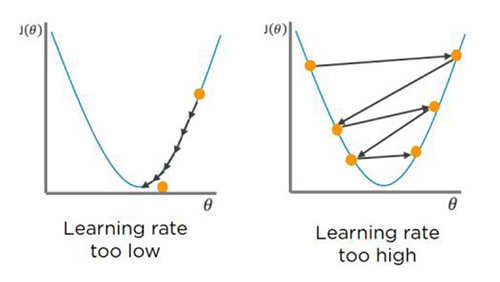

In the above two graphs we see the effect of high learning rates and effect of low learning rates. Each arrow depicts the change in the value at each subsequent step. A higher learning rate might saturate fast towards the local minimum where as the low learning rate takes much more iterations. But high learning rate might also start moving away from the local minimum hence increasing the loss. 


In [ ]:
#GRADED - 0.25 MARKS
def sgd(W, b, grads, alpha):
    """
    Args:
    'W' : (n, output_size) array
    'b' : (1,output_size)
    'grads': list of dW, db
    'alpha': learning rate
    Return:
    Updated parameters
    updated_w : updated value of 'W' using the formula given above 
    updated_b : updated value of 'b' using the formula given above
    """
    
    # YOUR CODE STARTS HERE
    return updated_w, updated_b
    raise NotImplementedError()

In [ ]:
#Sample test case for function sgd
#DO NOT CHANGE THIS CODE
np.random.seed(seed)
w_test = np.random.randn(2,1)
np.random.seed(seed+1)
b_test = np.random.randn(1,1)
sgdop = sgd(w_test,b_test,[w_test,b_test],0.01)
assert np.allclose(sgdop[0],[[ 0.49174701], [-0.13688166]])
assert np.allclose(sgdop[1],[[0.25482593]])
print('Sample Test passed', '\U0001F44D')

In [ ]:
# hidden test cases. Do not modify

## Build Model [0.5 marks]

Congratulations! Now we have all the helper functions required to build our model. In this final function, we will call above functions in a systematic way and let our model train on given dataset. Follow the instructions carefully.

### Steps to follow for building the model
The following operations need to be performed in the function "model" below:
<br/>
<br/>
1) Standardize X which is input to the model (Note that X is currently NOT standardized). DO NOT standardize Y, there is no need.

2) Ensure shape of X is (m,no.of features) where m is the number of data points and no. of features is 6

3) Initialise the parameters W and b using X (standardized) and Y with the help of the function *initialize_parameters*

4) For N number of iterations :

    - Calculate y_predicted by performing a forward pass(No need to standardize this y_predicted)
    
    - Find out the loss using y_predicted and y_true 
    
    - Append the current loss to a list of all losses so that we can return it and plot it
    
    - Calculate the Gradients
    
    - Update W and b using SGD
    
    - Now use these updated W and b to perform a forward pass in the next iteration and again compute loss, gradients,sgd and so on
    
NOTE : Use all the functions you have declared uptill now in the model function

In [ ]:
#GRADED - 0.5 MARKS
def model(X , Y, iterations=5000, learning_rate=0.001):
    """
    Args:
    'X': ndarray of shape (m,no. of features) which is NOT Standardized
    'Y': ndarray of shape (m,1)
    'iterations': iterations for training our data
    Returns:
    y_pred: predicted value of output
    y_true: true value of output (no need to standardize)
    losses: for grading purpose
    W , b : The final TRAINED weights and biases of the model
    Return in the following order : [y_pred , y_true, losses , W , b]
    """
    
    # YOUR CODE STARTS HERE

    # plot loss curve 
    plt.plot(losses) 
    plt.title('Training Loss')
    plt.ylabel('Loss')
    plt.xlabel('Iterations')
    plt.show()

    return y_pred , Y, losses, W , b 
    
    raise NotImplementedError()

In [ ]:
#RUN THIS CELL AS IT IS
np.random.seed(seed)
y_pred , y_true, sgd_losses, trained_w , trained_b = model(x_train, y_train)

In [ ]:
#Sample test case
assert np.allclose(sgd_losses[2000], 0.3595281475670042)
print('Sample Test passed', '\U0001F44D')

In [ ]:
def predict(x_test, trained_w, trained_b):
  x_test = standardize(x_test)
  return forward(x_test, trained_w, trained_b)

y_test_pred = predict(x_test, trained_w, trained_b)

In [ ]:
print("Final MSE loss in testing dataset: ", loss(y_test_pred, y_test))

# Part B - Logistic regression

---



---



---


Introduction: Logistic regression is a classification algorithm. It is used to predict a binary outcome based on a set of independent variables. It uses the sigmoid activation function. The diagram given below will give you a brief idea. We will explain more about logistic regression as we proceed.
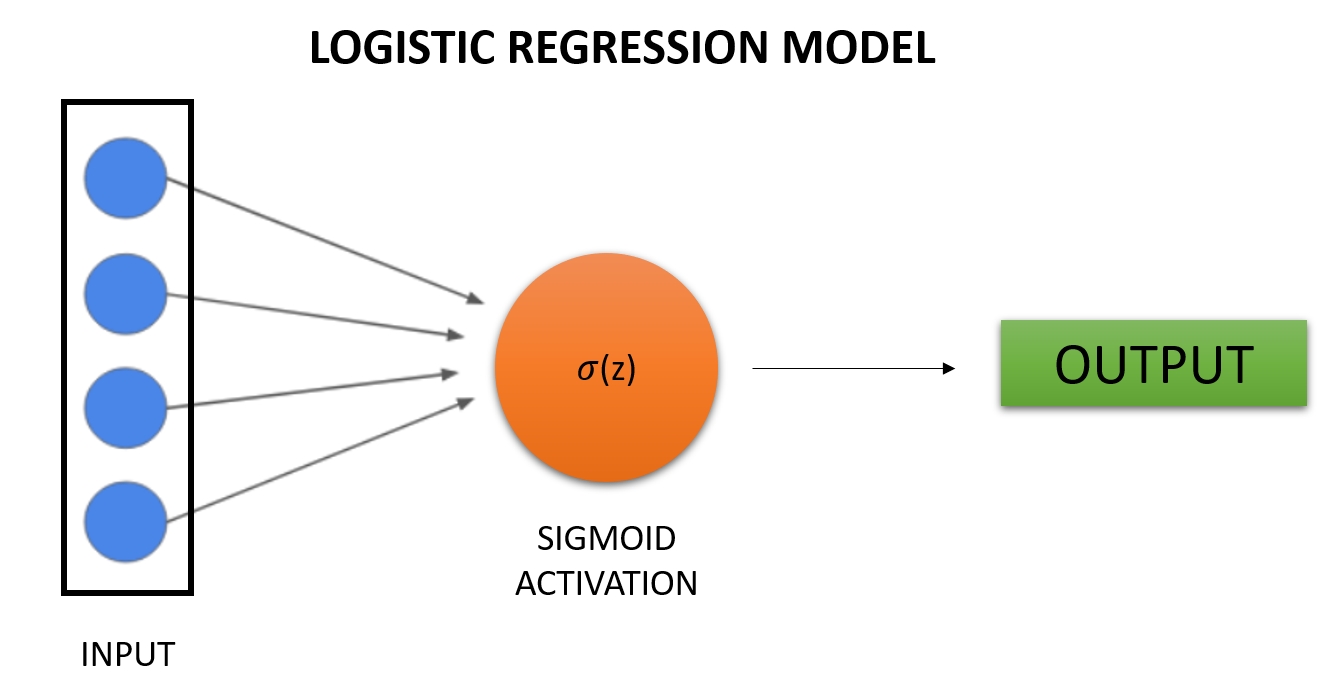

## Loading the Dataset
The only difference here (compared to the linear regression model) is that we are predicting the "Magnitude Type" instead of the actual "Magnitude".

In [ ]:
train = pd.read_csv('train.csv')
train_x = train[['Latitude', 'Longitude', 'Depth']]
y_train = np.array(train['Magnitude Type']).astype(float)
y_train = y_train.reshape(y_train.shape[0], 1)
x_train = np.array(train_x).astype(float)
x_train = x_train.reshape(x_train.shape[0], 3)
x_train = standardize(x_train)
x_train.shape

In [ ]:
test = pd.read_csv('test.csv')
test_x = test[['Latitude', 'Longitude', 'Depth']]
y_test = np.array(test['Magnitude Type']).astype(float)
y_test = y_test.reshape(y_test.shape[0], 1)
x_test = np.array(test_x).astype(float)
x_test = x_test.reshape(x_test.shape[0], 3)
x_test = standardize(x_test)
x_test.shape

## Binary Cross-Entropy Loss [0.5 marks]

A loss function is a measure of how good a prediction model does in terms of being able to predict the expected outcome. There is not a single loss function that works for all kind of data. It depends on a number of factors including the presence of outliers, choice of machine learning algorithm, time efficiency of gradient descent, ease of finding the derivatives and confidence of predictions.

For our dataset, we have chosen Binary Cross Entropy Loss because of its ease of implementation and wide use in logistic regression problems

# $ BCE = \frac{-\sum_{i = 1}^{m} (Y^{true}_ilog({Y^{pred}_i} + eps) + (1-Y^{true}_i)log(1-{Y^{pred}_i + eps}))}{m}$

here $Y^{pred}_i$ is the $i^{th}$ prediction value corresponding to $i^{th}$  $Y^{true}_i$ (actual)value. 
$m$ is the number of actual values 

In [ ]:
# GRADED - 0.5 Marks
def loss_compute(y_pred, yd, eps=1e-8):
    '''
    Inputs: 
    - y_pred: numpy array containing predicted values of target
    - yd: numpy array containing desired values of y given in the 
    dataset

    Outputs:
    - loss: Calculate and return the loss using the above formula
    '''
    
    # YOUR CODE STARTS HERE
    return loss
    raise NotImplementedError()


In [ ]:
#Sample test case
a1 = np.array([[1],[1],[1],[1],[1]])
a0 = np.array([[0],[0],[0],[0],[0]])
assert np.allclose(loss_compute(a1,a0), 18.420680743952367)
print('Sample Test passed', '\U0001F44D')

## Weight Initialization [0.5 marks]

As uncomplicated it may seem, initializing your weights play an important role in overall performance of your model. If initial wts. are too small/large then it may lead to problem of vanishing/emploding gradients respectively.

For introductory purpose, we will be taking weights from Gaussian Distribution. But there are has been tremendous research in this area, and Xavier Initialization has proved to be very effective for multiple tasks. There are in-built methods for Xavier initialization in frameworks like tensorflow, pytorch, caffe. To understand the maths behind Xavier Initialization, refer to the article attached below!

Refer to this article to understand the importance of effective initialization. [deeplearning.ai/notes](https://www.deeplearning.ai/ai-notes/initialization/#IV)

For our model we will be initialising Weights as an array or random integers and bias as array of zeroes. You can take help of formula $(i)$ from the next section's theory i.e. forward to know the relation between the dimensions of W and b with respect to X and Y. 

### 
Initialise weights with the shape given in function below having values **between 0 and 1** using numpy.random.rand function.

(NOTE : USE **numpy.random.rand** function for this. Different functions can create different random values and this might result in your code not passing the test cases)

> Initialise bias with the shape given below as a numpy array having all zeros.

In [ ]:
#GRADED - 0.5 MARKS
def initialization(I, H1, H2, H3, O):
    '''
    Weights are initialized to random values in the range [0, 0.1) using np.random.rand appropriately and
    biases are initialized to zero. The dimensions of the
    parameters as as follows:- 

          W1: First layer weights; has shape (H1, I)
          b1: First layer biases; has shape (H1, 1)
          m_dW1: Momentum of First layer weights; has shape (H1, I)
          m_db1: Momentum of First layer biases; has shape (H1, 1)
          v_dW1: RMS of First layer weights; has shape (H1, I)
          v_db1: RMS of First layer weights; has shape (H1, 1)
          W2: Second layer weights; has shape (H2, H1)
          b2: Second layer biases; has shape (H2, 1)
          m_dW2: Momentum of Second layer weights; has shape (H2, H1)
          m_db2: Momentum of Second layer biases; has shape (H2, 1)
          v_dW2: RMS of Second layer weights; has shape (H2, H1)
          v_db2: RMS of Second layer weights; has shape (H2, 1)
          W3: Third layer weights; has shape (H3, H2)
          b3: Third layer biases; has shape (H3, 1)
          m_dW3: Momentum of Third layer weights; has shape (H3, H2)
          m_db3: Momentum of Third layer biases; has shape (H3, 1)
          v_dW3: RMS of Third layer weights; has shape (H3, H2)
          v_db3: RMS of Third layer weights; has shape (H3, 1)
          W4: Fourth layer weights has shape (O,H3)
          b4: Fourth layer biases; has shape (O,1)
          m_dW2: Momentum of Fourth layer weights; has shape (O, H3)
          m_db2: Momentum of Fourth layer biases; has shape (O, 1)
          v_dW2: RMS of Fourth layer weights; has shape (O, H3)
          v_db2: RMS of Fourth layer weights; has shape (O, 1)

          Inputs:
          - I: The number of features of the input data.
          - H1: The number of neurons in the hidden layer - 1.
          - H2: The number of neurons in the hidden layer - 2.
          - H3: The number of neurons in the hidden layer - 3.
          - O: The number of outputs(i.e. 1).

          Outputs:
          - paramters_final: List containing of parameters 
          after they are initialized with appropriate values in this order:
          [W1, b1, m_dw1, m_db1, v_dw1, v_db1, W2, b2, m_dw2, m_db2, v_dw2, v_db2, W3, b3, m_dw3, m_db3, v_dw3, v_db3, W4, b4, m_dw4, m_db4, v_dw4, v_db4]
        '''
    
    # YOUR CODE STARTS HERE
    return [W1, b1, m_dw1, m_db1, v_dw1, v_db1, W2, b2, m_dw2, m_db2, v_dw2, v_db2, W3, b3, m_dw3, m_db3, v_dw3, v_db3, W4, b4, m_dw4, m_db4, v_dw4, v_db4]
    raise NotImplementedError()

In [ ]:
#Sample test case
np.random.seed(seed)
parameters = initialization(3, 8, 16, 8, 1)
assert parameters[0].shape == (8,3)
assert parameters[13].shape == (8,1)
print('Sample Test passed', '\U0001F44D')

## Sigmoid Activation Function [0.25 marks]


# $ \boxed{Y_{pred} = Activation function (w_1 x_1 + w_2 x_2 + .... + w_i x_i + b)}\hspace{4cm} -(i)$

The activation function we'll be using here will be sigmoid. This ensures differentiability and gives output in the range of [0,1], which we want

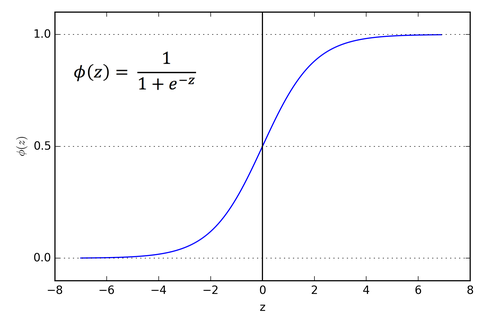

# $ Y_{pred} = sigmoid (X \cdot W + b)$

In [ ]:
#GRADED - 0.25 MARKS
def sigmoid(Z):
    """
    Args:
    'Z': ndarray of shape (m,output_size)
    Returns:
    calculated sigmoid of Z
    """
    # YOUR CODE STARTS HERE
    return sig
    raise NotImplementedError()

In [ ]:
#Sample test case
assert np.allclose(sigmoid(np.linspace(-10, 5, 10))[3], 6.69285092e-03)
print('Sample Test passed', '\U0001F44D')

## Swish Activation Function [0.25 marks]

The most commonly used activation function was ReLU which is f(x) = max(0,x). The consistent problem with ReLU was that the derivative of x is zero for half of the values of x in the ramp function, i.e. f(x) = max(0,x). The introduction of Swish gave a smooth, non-monotonic function that consistently matches or outperforms ReLU on deep neural networks in a variety of domains. Unlike ReLU, it does not have the problem of dying neurons.


![Alt text](https://miro.medium.com/max/1248/1*rBfSD7_bNCmmhGnyksNEPg.png)

>   # $ Y_{pred} = x*sigmoid (X \cdot W + b) = \frac{x}{(1 + e^{-x})}$







In [ ]:
#GRADED - 0.25 MARKS
def swish(Z):
    """
    Args:
    'Z': ndarray of shape (m,output_size)
    Returns:
    calculated swish of Z
    """
    # YOUR CODE STARTS HERE
    return out
    raise NotImplementedError()

In [ ]:
#Sample test case
assert np.allclose(swish(np.linspace(-10, 5, 10))[1], -2.00259761e-03)
print('Sample Test passed', '\U0001F44D')

## L2 Regularization [0.25 marks]



**Regularization**:
It is a technique that discourages learning a more complex or flexible model, so as to avoid the risk of overfitting. It improves the generalization capability of a model, i.e. its performance on unseen test examples.

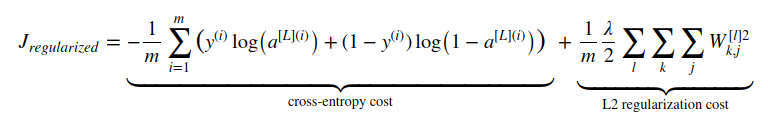

where (k, j) refer to the shape of W and l refers to the layer number

In [ ]:
# GRADED - 0.25 Marks
def regularization_L2(lmbda, W1, W2, W3, W4, m):
    '''
    Inputs:
    - lmbda: Regularization parameter
    - W1, W2, W3, W4: numpy arrays containing weights of the model
    - m: no of examples

    Outputs:
    - total_reg_loss: sum of L2 regularization loss of each layer
    '''
    # YOUR CODE STARTS HERE

    return reg_cost
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
#Sample test case
np.random.seed(seed)
parameters = initialization(3, 8, 16, 8, 1)
W1 = parameters[0]
W2 = parameters[6]
W3 = parameters[12]
W4 = parameters[18]
assert np.allclose(regularization_L2(1,W1,W2,W3,W4,1),0.48454498104111476)
print('Sample Test passed', '\U0001F44D')

## Forward Pass [0.5 marks]




### Terminologies used for describing the computations of the Neural Network:
* Superscript $[h]$ denotes a quantity associated with the $h^{th}$ layer. 
    - Example: $a^{[h]}$ is the $h^{th}$ layer activation. $W^{[h]}$ and $b^{[h]}$ are the $h^{th}$ layer parameters.
* Superscript $(i)$ denotes a quantity associated with the $i^{th}$ example. 
    - Example: $y^{(i)}$ is the ground truth label corresponding to the $i^{th}$ training example.



* A layer of the neural network consists of:
    - a weight matrix $W^{[h]}$of shape (size of current layer, size of previous layer)
    - a bias vector $b^{[h]} $of shape (size of current layer, 1)
    - an activation function $ g^{[h]} $




In [ ]:
#GRADED - 0.5 MARKS
def feed_forward(X, params):
    '''
    Using the formulae given below, apply forward propagation for each layer according to the defined architecture

    z = X(W.T) + b {W.T is the transpose of weight matrix}
    a = g(z)  {g being the non linear function i.e the activation function}

    Inputs:
    - X : Input data of shape (6, total_number_of_rows). Each X[i] is a feature and each X[:][i] is a training sample
    - params: List containing the parameters (weights and bias of each layer in the order: w1,b1,w2,b2,w3,b3,w4,b4) of the model

    Outputs:
    - y_out (or a4) : predicted price
    - l : List containing the activation and linear outputs of each layer in the following fashion
      [z1,a1,z2,a2,z3,a3,z4,a4]
    '''
    
    # YOUR CODE STARTS HERE
    
    return a4, [z1, a1, z2, a2, z3, a3, z4, a4]
    raise NotImplementedError()

In [ ]:
#Sample test case
np.random.seed(seed)
params = initialization(3, 3, 2, 2, 1)
y_forward,l = feed_forward(np.random.rand(10,3), params)
assert y_forward.shape == (10,1)
print('Sample Test passed', '\U0001F44D')

## Backward pass
Now that we are done with implementing the forward pass, we'll move on to individual modules required for the backward pass.

### Derivatives of Swish and Sigmoid [0.25 marks]


Our next step will be to create some helper functions before starting backpropagation

We would need derivatives of **Swish** function and **Sigmoid** function 

Hint: ReLU function derivative can be calculated in one step using lambda functions. For more information, refer to this link: https://www.w3schools.com/python/python_lambda.asp 


Note the following rules for different activation functions:
$$ \frac{\partial \mathcal{(swish(z))} }{\partial z} =   sigmoid(z) + swish(z)*(1-sigmoid(z))  $$ \\

$$ \frac{\partial \mathcal{(sigmoid(z))} }{\partial z} = sigmoid(z) * (1-sigmoid(z))$$


In [ ]:
# GRADED - 0.25 Marks

# Define two functions dswish and dSigmoid which return the respective derivatives
# input can be of any 1D, 2D shape

def dswish(z):
    
    # YOUR CODE STARTS HERE
    return dS
    raise NotImplementedError()

def dSigmoid(z):
    
    # YOUR CODE STARTS HERE
    return ds
    raise NotImplementedError()

In [ ]:
#Sample test case
a0 = np.linspace(-10, 5, 10)
assert np.allclose(dswish(a0)[0],-4.08560209e-04)
assert np.allclose(dSigmoid(a0)[0],4.53958077e-05)
print('Sample Test passed', '\U0001F44D')

### Derivatives of activation function variable [0.25 marks]

Given the weights of a layer and the derivative of the linear function involved in the same layer, we calculate the derivative of the activation function variable for the next step of backpropagation.

$$ = dz * W $$

In [ ]:
# GRADED - 0.25 Marks

def back_prop_actf(W_plusone, dz_plusone):
    '''
    Inputs:
    - W_plusone: Weights of the next layer
    - dz_plusone: Derivative of the linear function of the next
    layer

    Outputs:
    - act_dtive: returns the derivative of activation function variable
    '''
   # YOUR CODE STARTS HERE
    return act_dtive

    raise NotImplementedError()

In [ ]:
#Sample test case
np.random.seed(seed)
params = initialization(3, 3, 2, 2, 1)
W2 = params[6]
dz2 = np.random.rand(10,2)
assert back_prop_actf(W2,dz2).shape == (10,3)
print('Sample Test passed', '\U0001F44D')

### Derivatives of a linear layer [0.25 marks]

This is another helper function required to calculate the derivatives of linear layers and output the gradients of the linear function variable and change in the weights & bias for the same layer.

Depending on whether the activation function is **Swish** or **Sigmoid**, we calculate their derivatives using the helper function above.

That is, if **Swish**, then:

## $ dz =  sigmoid(z) + swish(z)*(1-sigmoid(z))  $

and if **Sigmoid**, then:

## $ dz = sigmoid(z) * (1-sigmoid(z)) $

By applying chain rule we can get vector forms of all dw's as dW and all db's as dB

## $ dW =  \frac{dz^T*X}{m} + \frac{λ * W}{m}  $

## $ db =  \sum\frac{dz}{m}  $

In [ ]:
# GRADED - 0.25 Marks

def back_prop_linear(da_layer, z_layer, input, act_fxn, m, lmbda, weight):
    '''
    Inputs:
    - da_layer: derivative of variable 'a' of that layer
    - z_layer: numpy array of 'z' values
    
    - input: input value of that layer, for example, X is the
    input for the first layer, and for other layers, it is the activation A of the previous layer
    
    - act_fxn: string containing the name of the activation 
    function used in that layer,i.e. 'sigmoid' or 'swish' (depending on this, the appropriate function is called)
    
    - m: number of datapoints
    - lmbda: regularization parameter
    - weight: weights of that particular layer
  
      Outputs:
    - dz: returns the derivative of linear function variable
    - dW: returns the change in weights for that layer
    - db: returns the change in bias for that layer
    '''

    # YOUR CODE STARTS HERE
    return dz,dW,db
    raise NotImplementedError()

In [ ]:
#Sample test case
np.random.seed(seed)
W = np.random.rand(2,3)
a = np.random.rand(10,3)
z = np.random.rand(10,2)
da = np.random.rand(10,2)
act_fxn = 'swish'
m = 1
lmbda = 0.005
dz,dW,db = back_prop_linear(da,z,a,act_fxn,lmbda,m,W)
assert dW.shape == W.shape
assert dz.shape == z.shape
print('Sample Test passed', '\U0001F44D')

### Cumulative Backpropagation [0.5 marks]

Now we will be creating the main function for backpropagation where we combine all the helper functions to update the weights. We will first compute errors at the last layer and backpropagate them through the network to get the desired $dW$ and $db$ for each layer.

We would using a single function to return these values as the formula remains the same.

To backpropagate through this network, we know that the output is, $ ypred = A^{[H]} = sigmoid(Z^{[H]})$. Your code thus needs to compute $ dA^{[H]} = \frac{\partial \mathcal{L}}{\partial A^{[H]}}$. To do so, use this formula: \\
$$ dA^{[H]} = -(Y / A^{[H]} - (1-Y)/(1-A^{[H]}))$$
where $ "/" \ denotes \ elementwise \ division$

Remember: This is only for the last layer, use the above helper function for the other layers.

**HINT:** Use the back_prop_linear function to obtain $dz,dW,db$ at each layer.

Use the swish activation function to pass as parameter to back_prop_linear at each step for the other layers.

In [ ]:
# GRADED - 0.5 Marks

def backpropagation(X, yd, l, y_pred, parameters, lmbda):
    '''
      Inputs:
      - X: Input features - shape (no of features, no of examples)
      - yd: y desired values(labels given in dataset)
      - l: list containing values of 'z' and 'a' of each layer
      - parameters: list containing weights and biases of each layer
      - lmbda: regularization parameter

      Outputs:
      - grad: dictionary containing the change in the values of weights
      and biases with keys 'dW1','db1','dW2','db2','dW3','db3','dW4','db4' 
    '''
    # YOUR CODE STARTS HERE


    return gradients
    raise NotImplementedError()

In [ ]:
#Sample test case
np.random.seed(seed)
params = initialization(3, 3, 2, 2, 1)
X = np.random.rand(10,3)
y_forward,l = feed_forward(X,params)
lmbda = 0.005
gradients = backpropagation(X,y_forward,l,y_forward,params,lmbda)
assert gradients['dW1'].shape == (3,3)
assert gradients['db4'].shape == (1,1)
print('Sample Test passed', '\U0001F44D')

## Updating the weights
**Adam**


Adaptive Moment Estimation (Adam) is a method that computes adaptive learning rates for each parameter. In addition to storing an exponentially decaying average of past squared gradients like RMSprop, Adam also keeps an exponentially decaying average of past gradients, similar to momentum. Whereas 
momentum can be seen as a ball running down a slope, Adam behaves like a heavy ball with friction, which thus prefers flat minima in the error surface.
        

In [ ]:
def update(t, w, b, dw, db, m_dw, m_db, v_dw, v_db, eta=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
      ## dw, db are from current minibatch
      ## momentum beta 1
      # *** weights *** #
      m_dw = beta1*m_dw + (1-beta1)*dw
      # *** biases *** #
      m_db = beta1*m_db + (1-beta1)*db

      ## rms beta 2
      # *** weights *** #
      v_dw = beta2*v_dw + (1-beta2)*(dw**2)
      # *** biases *** #
      v_db = beta2*v_db + (1-beta2)*(np.abs(db))

      ## bias correction
      m_dw_corr = m_dw/(1-beta1**t)
      m_db_corr = m_db/(1-beta1**t)
      v_dw_corr = v_dw/(1-beta2**t)
      v_db_corr = v_db/(1-beta2**t)


      ## update weights and biases
      w = w - eta*(m_dw_corr/(np.sqrt(v_dw_corr)+epsilon))
      b = b - eta*(m_db_corr/(np.sqrt(v_db_corr)+epsilon))
      return w, b, m_dw, m_db, v_dw, v_db

## Training the Model [1 mark]


For training the model you need to do the following in the next function:

1) You are provided with *X, yd, parameters* as arguments. *X* and *yd* are scaled so **DO NOT** scale them again inside this *training* function 

2) Store W1 to W4 and b1 to b4 (weights and biases) in **seperate variables** by accessing the *parameters* argument

3) Initialise an empty list to which you will append the loss of every iteration

4) Now for N number of iterations:
     - compute y_predicted and a5 using feedforward
     
     - compute loss using y_predicted and yd - say loss_1
     
     - calculate regularization loss say loss_2
     
     - total loss = loss_1 + loss_2
     
     - append this to the list you created in step 3
     
     - calculate gradients
     
     - update W1 to W4 and b1 to b4 by using the gradients calculated above
     
     - in the next iteration, when using feed forward use these updated W1 to W4 and b1 to b4
     
     - And then follow this for N iterations
     
5) Return the history of loss, loss_val (that list you created in step 3 populated with loss of every iteration) and the trained *parameters*

In [ ]:
# GRADED - 1 Mark

# Make a habit to print the value of loss after a fixed number of iterations to 
# check whether your model is working well or not.

def training(X, yd, parameters, alpha = 0.01, num_iters=3000, lmbda = 0.0001):
    '''
      Inputs:
      - X: Input features - shape (no of features, no of examples)
      - yd: y desired values(labels given in dataset)
      - parameters: the currents weights, biases and the runnning moments and variance
      - alpha: learning rate
      - num_iters: number of iterations
      - lmbda: regularization parameter

      Outputs:
      - history: list of loss at the start of each iteration 
      - parameters: the final parameters in the order
        [W1_new, b1_new, m_dw1_new, m_db1_new, v_dw1_new, v_db1_new, 
        W2_new, b2_new, m_dw2_new, m_db2_new, v_dw2_new, v_db2_new, 
        W3_new, b3_new, m_dw3_new, m_db3_new, v_dw3_new, v_db3_new,
        W4_new, b4_new, m_dw4_new, m_db4_new, v_dw4_new, v_db4_new]
    '''
    # YOUR CODE STARTS HERE
    return history, parameters
    raise NotImplementedError()

In [ ]:
#Sample test case
np.random.seed(seed)
parameters = initialization(3, 8, 16, 8, 1)
history, parameters_final = training(x_train.T, y_train, parameters, alpha = 0.05, num_iters=500, lmbda = 0.0001)

assert np.allclose(parameters_final[1][2],-0.05750826)
assert np.allclose(parameters_final[6][0][0],0.9983610037602721)
print('Sample Test passed', '\U0001F44D')

## Plots of Training Loss versus Number of Iterations



In [ ]:
## Training Loss
plt.plot(history)
plt.ylabel('loss')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(0.05))
plt.show()

## Calculating Final Accuracy
You should get a value of around 0.6 on the training data and around 0.58 on the test data.

In [ ]:
y_final = feed_forward(x_train, parameters_final)
y_final = (y_final[0] >= 0.5)*1 
train_acc = np.sum((y_final == y_train))/ y_train.shape[0]
print(train_acc)

In [ ]:
y_final = feed_forward(x_test, parameters_final)
y_final = (y_final[0] >= 0.5)*1 
test_acc = np.sum((y_final == y_test))/ y_test.shape[0]
print(test_acc)